In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


In [2]:
np.set_printoptions(suppress=True, linewidth=150, precision=2)
np.random.seed(123456)

## Clusters Specification

In [67]:
N = 1000 # Number of Entities
K = 7 # Number of Clusters
V = 5  # Number of Features
minimum = 50  # Minimum Number of Entities in each cluster

remaining = N - K * minimum
remaining

650

In [68]:
ur = [np.random.uniform() for k in range(K-1)]
ur.sort()

In [69]:
structures = []
tmp = []
for k in range(K-1):
    if k == 0:
        tmp.append(ur[k]-0)
    elif k == K-2:
        tmp.append(1-ur[k])
    else:
        tmp.append(ur[k+1]-ur[k])
        

In [70]:
structures = [int(remaining*i+ minimum) for i in tmp]
structures += [N - sum(structures)]
print(structures, sum(structures))

[195, 173, 145, 79, 268, 79, 61] 1000


In [71]:
d1, d2 = 1, -1
a = 1.0

In [72]:
mu_1 = np.multiply(np.random.uniform(low=d2, high=d1, size=K), 1.0)
mu_2 = np.multiply(np.random.uniform(low=d2, high=d1, size=K), 0.75)
mu_3 = np.multiply(np.random.uniform(low=d2, high=d1, size=K), 0.5)
mu_4 = np.multiply(np.random.uniform(low=d2, high=d1, size=K), 0.25)
mu_1

array([-0.48,  0.36, -0.27, -0.8 ,  0.64,  0.59, -0.11])

In [73]:
d1_ = 0.05*2
d2_ = 0.025*2

cov = np.diag(np.random.uniform(low=d2_, high=d1_, size=(K, K)))
cov

array([0.06, 0.06, 0.05, 0.05, 0.06, 0.06, 0.07])

### Create Y matrix with a=1 (few or no intermix)

In [74]:
Y1 = np.zeros([N, V])
interval = 0
for k in range(K):
    for i in range(interval, structures[k]+interval):
        Y1[i, :] = np.random.normal(loc=mu_1[k], scale=cov[k], size=V)
    interval += structures[k]

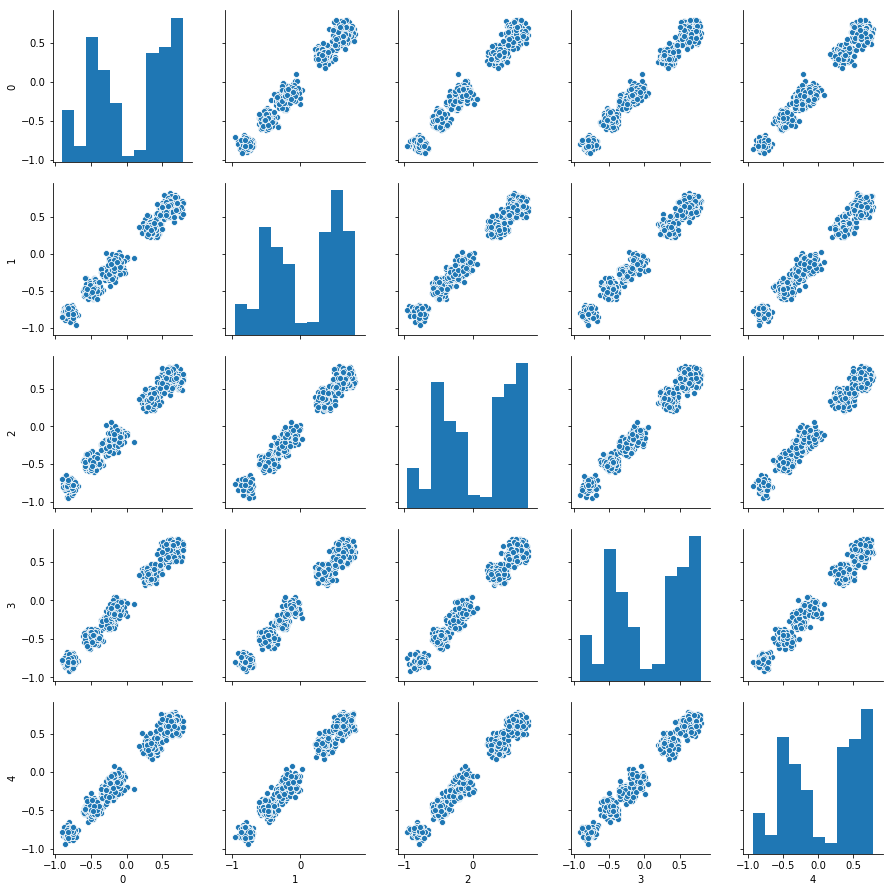

In [75]:
t1 = pd.DataFrame(Y1)  # Create a Pandas DataFrame to plot scatter plots and Histogram of Y
sns.pairplot(t1)
plt.show()

### Compute PCA as it is mentioned in the paper

In [76]:
pca = PCA(n_components=2)
Y_r1 = pca.fit(Y1).transform(Y1)

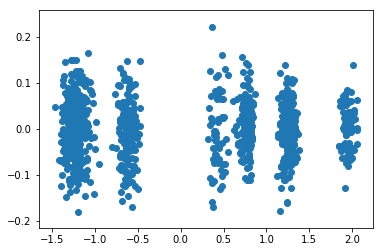

In [77]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
target_names = list(range(V))

plt.scatter(Y_r1[:, 0], Y_r1[:,1])
plt.show()

The Problem is' in this scatter plot shows just 5 clusters instead of 7 clusters.

### Now let us repeat the procedure with a=0.75

In [78]:
Y2 = np.zeros([N, V])
interval = 0
for k in range(K):
    for i in range(interval, structures[k]+interval):
        Y2[i, :] = np.random.normal(loc=mu_2[k], scale=cov[k], size=V)
    interval += structures[k]

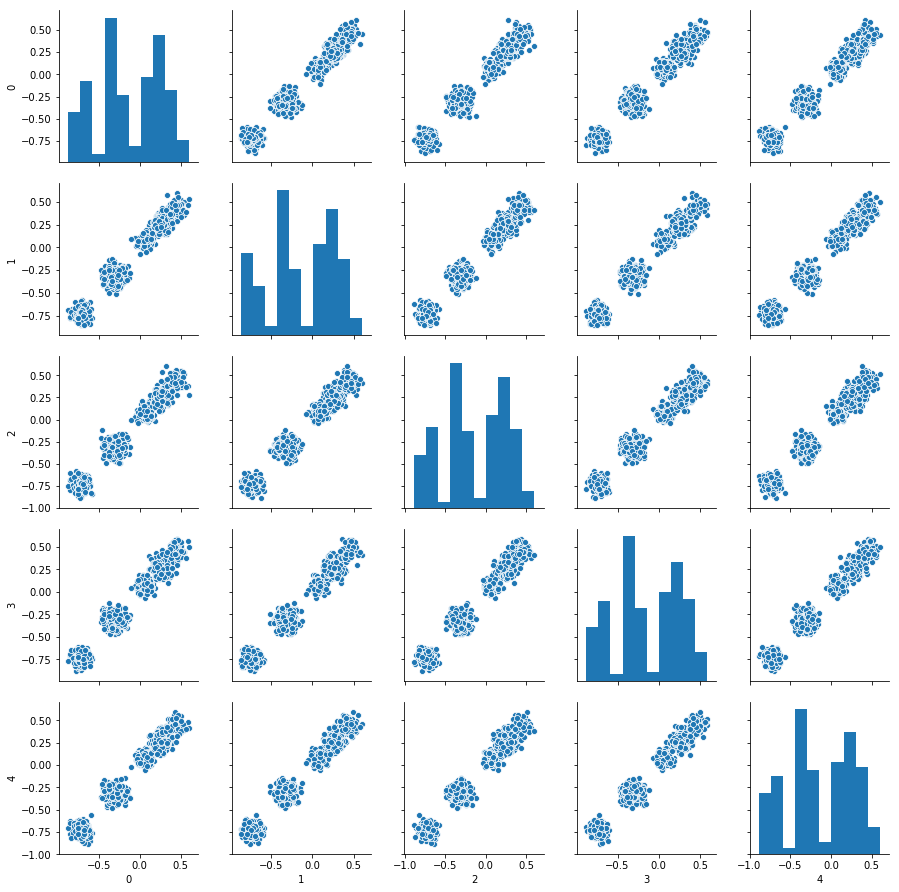

In [79]:
t2 = pd.DataFrame(Y2)  # Create a Pandas DataFrame to plot scatter plots and Histogram of Y
sns.pairplot(t2)
plt.show()

### Compute PCA as it is used in the paper

In [80]:
pca = PCA(n_components=2)
Y_r2 = pca.fit(Y2).transform(Y2)

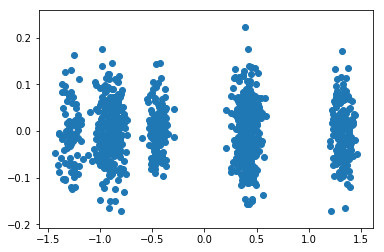

In [81]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
target_names = list(range(V))

plt.scatter(Y_r2[:, 0], Y_r2[:,1])
plt.show()

Now the Five clusters are intermixed as we expected!

### Now let us repeat the procedure with a=0.5

In [82]:
Y3 = np.zeros([N, V])
interval = 0
for k in range(K):
    for i in range(interval, structures[k]+interval):
        Y3[i, :] = np.random.normal(loc=mu_3[k], scale=cov[k], size=V)
    interval += structures[k]

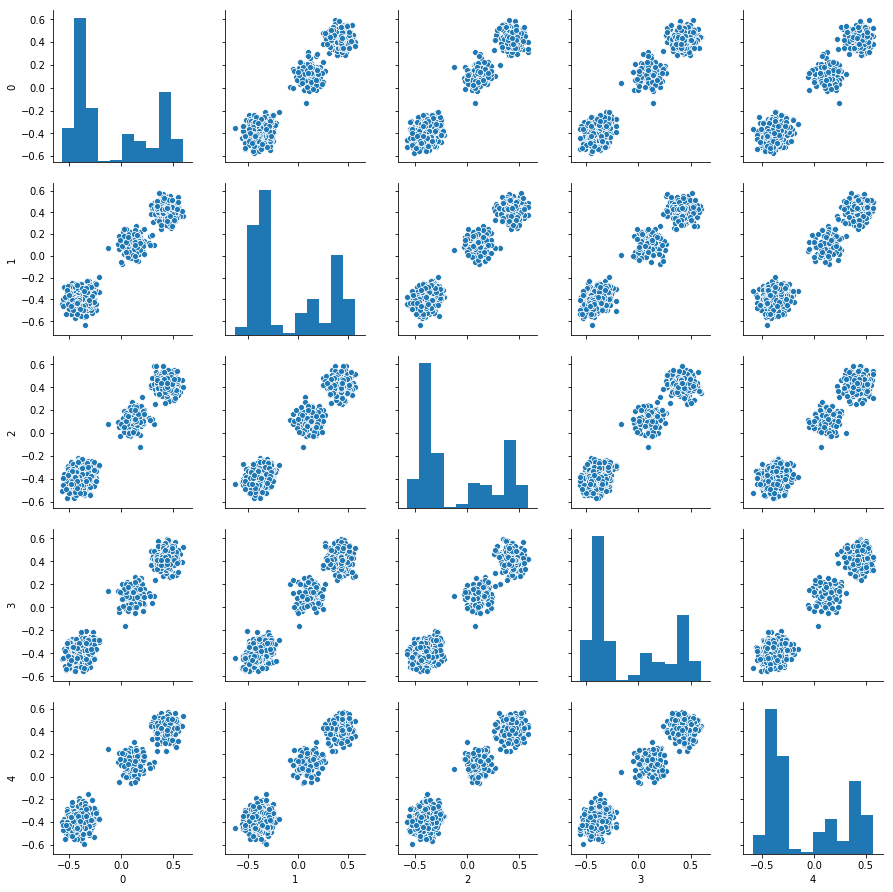

In [83]:
t3 = pd.DataFrame(Y3)  # Create a Pandas DataFrame to plot scatter plots and Histogram of Y
sns.pairplot(t3)
plt.show()

### Compute PCA as it is used in the paper

In [84]:
pca = PCA(n_components=2)
Y_r3 = pca.fit(Y3).transform(Y3)

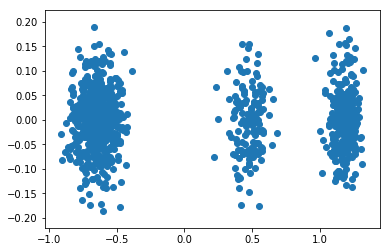

In [85]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
target_names = list(range(V))

plt.scatter(Y_r3[:, 0], Y_r3[:,1])
plt.show()

Now the clusters are more intermixed as it is expected!